In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
observations = 1000

xs = np.random.uniform(low = - 10, high = 10, size = (observations,1))
zs = np.random.uniform(low = -10, high = 10, size = (observations,1))

generated_inputs = np.column_stack((xs,zs))
noise = np.random.uniform(-1,1,(observations,1))

generated_targets = 2*xs - 3*zs + 5 + noise

#saving it in tensor format
np.savez('TF_intro', inputs = generated_inputs, target = generated_targets)

Solving with tensorflow

In [3]:
input_size = 2
output_size = 1

Outlining the Model

In [6]:
#tensorflow format 3D matrix
inputs = tf.placeholder(tf.float32,[None, input_size])
targets = tf.placeholder(tf.float32,[None, output_size])

weights = tf.Variable(tf.random.uniform([input_size, output_size], minval = -.01, maxval = 0.1))
biases = tf.Variable(tf.random.uniform([output_size], minval = -0.1, maxval = 0.1))

outputs = tf.matmul(inputs,weights) + biases

Instructions for updating:
Colocations handled automatically by placer.


Choosing the objective function and optimization

In [8]:
mean_loss = tf.losses.mean_squared_error(labels = targets, predictions = outputs) / 2. #average L2norm loss function

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.05).minimize(mean_loss) #optimize and minimize

In [9]:
sess = tf.InteractiveSession()

Initializing Variablesr

In [10]:
initializer = tf.global_variables_initializer()

sess.run(initializer)

Load training data

In [11]:
training_data = np.load('TF_intro.npz')

Learning

In [14]:
for e in range(100):
    _, curr_loss = sess.run([optimizer, mean_loss], feed_dict = {inputs: training_data['inputs'], targets: training_data['target'] })
    print (curr_loss)

0.17614746
0.17610404
0.17606485
0.17602937
0.1759975
0.17596866
0.17594263
0.17591919
0.17589797
0.17587887
0.17586157
0.175846
0.17583191
0.1758192
0.17580777
0.17579745
0.17578812
0.17577973
0.1757721
0.17576526
0.17575905
0.17575344
0.17574841
0.17574386
0.17573969
0.175736
0.17573269
0.17572962
0.17572694
0.17572452
0.1757222
0.17572019
0.17571844
0.17571683
0.17571533
0.17571396
0.17571276
0.17571166
0.17571072
0.17570983
0.17570901
0.17570828
0.17570758
0.17570707
0.17570657
0.17570609
0.17570566
0.17570525
0.17570491
0.17570452
0.17570429
0.17570402
0.17570378
0.17570359
0.17570344
0.17570323
0.17570308
0.17570294
0.17570285
0.17570269
0.17570257
0.17570248
0.17570242
0.17570233
0.17570227
0.17570221
0.17570217
0.17570208
0.17570205
0.17570208
0.17570202
0.17570193
0.1757019
0.17570184
0.1757019
0.17570186
0.17570181
0.17570178
0.17570178
0.17570177
0.17570177
0.17570178
0.17570177
0.17570175
0.17570171
0.17570172
0.17570175
0.17570172
0.17570174
0.1757017
0.17570174
0.17570172

Plot the data

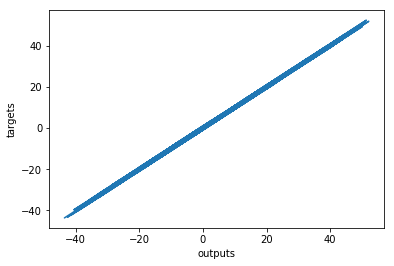

In [15]:
out = sess.run([outputs], feed_dict ={inputs : training_data['inputs']})

plt.plot(np.squeeze(out), np.squeeze(training_data['target']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()